<a href="https://colab.research.google.com/github/BiplabBag/Hand_written_digit_Recognition/blob/main/Hand_written_digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt

Dividing  Dataset into Train and Test 

In [2]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Visualising Examples with Labels

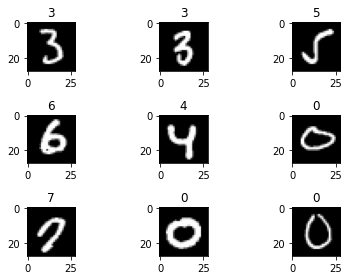

In [3]:
def display_some_images(examples,labels):
    
    for i in range(9):
        idx = np.random.randint(0, examples.shape[0]-1)
        img = examples[idx]
        label = labels[idx]
        
        plt.Figure(figsize = (30,30))
        plt.subplot(3,3,i+1)
        plt.title(str(label))
        plt.tight_layout()
        plt.imshow(img, cmap = 'gray') # as the images are in gray scale we use cmap = 'gray'
    plt.show()    
display_some_images(x_train,y_train)

# Preprocess the data
The value of each pixel in the image data is an integer in the range [0,255]. For the model to work properly, these values need to be normalized to the range [0,1]. So here we create a normalization function, and then apply it to each image in the test and train datasets. 'float32' is used to convert intesity level from 'uint8' type to float type. 

In [4]:
x_train =  x_train.astype('float32')/255
x_test  =  x_test.astype('float32')/255

# Build the model
Building the neural network requires configuring the layers of the model, then compiling the model.

# Setup the layers
The basic building block of a neural network is the layer. A layer consists of several neurons.No of layers and no of neurons in each layers are variables and can be modified for better accuracy. 

In [5]:
model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tensorflow.keras.layers.Dense(64, activation=tensorflow.nn.relu),
    tensorflow.keras.layers.Dense(64, activation=tensorflow.nn.relu),
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

This network has three layers:

**input** tf.keras.layers.Flatten — This layer transforms the images from a 2d-array of 28  ×  28 pixels, to a 1d-array of 784 pixels (28*28).

**hidden** tf.keras.layers.Dense— Two densely connected layer of 64 neurons in each. Each neuron (or node) takes input from all 784 nodes in the previous layer, weighting that input according to hidden parameters which will be learned during training, and outputs a single value to the next layer.

**output** tf.keras.layers.Dense — Two layers of 64-neurons in each, followed by 10-node softmax layer. Each node represents a digit. As in the previous layer, the final layer takes input from the 64 nodes in the layer before it, and outputs a value in the range [0, 1], representing the probability that the image belongs to that class. The sum of all 10 node values is 1.

**note** SparseCategoricalCrossentropy() will provide the loss.

# Compile the model
Some more functionalities are added with the model. These are added during the model's compile step:

Loss function — An algorithm for measuring how far the model's outputs are from the desired output. The goal of training is this measures loss.
Optimizer —An algorithm for adjusting the inner parameters of the model in order to minimize loss.
Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [6]:
model.compile(optimizer='adam',
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
Model is fitted with training data.

**batch_size** udation of internal paraters after the pass of that no of examples(nof of exxamples is equal to batchsize)

**epochs** in total training time how many times the whole dataset is passed through the model

In [7]:
model.fit(x_train, y_train, batch_size = 64, epochs=5)

Epoch 1/5
938/938 [==============================] - 5s 3ms/step - loss: 0.3257 - accuracy: 0.9074
Epoch 2/5
938/938 [==============================] - 2s 3ms/step - loss: 0.1407 - accuracy: 0.9582
Epoch 3/5
938/938 [==============================] - 2s 3ms/step - loss: 0.1016 - accuracy: 0.9687
Epoch 4/5
938/938 [==============================] - 2s 3ms/step - loss: 0.0791 - accuracy: 0.9759
Epoch 5/5
938/938 [==============================] - 2s 3ms/step - loss: 0.0647 - accuracy: 0.9803


# Evaluate accuracy
Next, compare how the model performs on the test dataset. Use all examples we have in the test dataset to assess accuracy.

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size = 64)
print('Accuracy of the model:', test_accuracy)


157/157 [==============================] - 0s 2ms/step - loss: 0.0885 - accuracy: 0.9720
Accuracy of the model: 0.972000002861023


# Make predictions and visualise
With the model trained, we can use it to make predictions and visualise some images.

In [16]:
def predict_and_display_images(examples,labels):
        imges = examples[0:9][:][:]           # only take 9 examples from x_test
        prediction = model.predict(imges)      # model.predict(imges) return 2-d array of 9 probability distribution
        for i in range(9):
                  pred_label = np.argmax(prediction[i]) # give the predicted label of each test case
                  img = examples[i]
                  plt.Figure(figsize = (30,30))
                  plt.subplot(3,3,i+1)
                  plt.title('Predicted lebel ' + str(pred_label))
                  plt.tight_layout()
                  plt.imshow(img, cmap = 'gray') # as the images are in gray scale we use cmap = 'gray'
        plt.show()

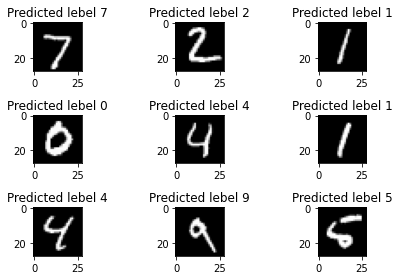

In [17]:
predict_and_display_images(x_test,y_test)

From the labels of each of the above images, it is clear that all images are correctly recognised.